# 3.1 Anatomy of a neural network

As you saw in the previous chapters, training a neural network revolves around the following
objects:

* _Layers,_ which are combined into a _network_ (or _model_)
* The _input data_ and corresponding _targets_
* The _loss function_, which defines the feedback signal used for learning
* The _optimizer_, which determines how learning proceeds

You can visualize their interaction as illustrated in figure below :

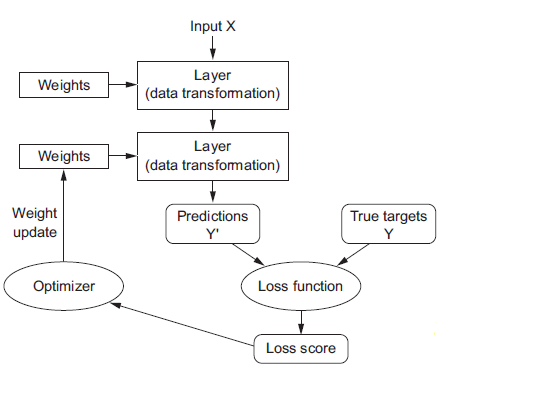

## 3.1.1 Layers: the building blocks of deep learning

You can think of layers as the LEGO bricks of deep learning, a metaphor that is
made explicit by frameworks like Keras. Building deep-learning models in Keras is
done by clipping together compatible layers to form useful data-transformation pipelines.
The notion of _layer compatibility_ here refers specifically to the fact that every layer
will only accept input tensors of a certain shape and will return output tensors of a certain
shape. Consider the following example:

In [1]:
from keras import layers
# A dense layer with (*, 784) shape.
# NOTE :
# input_shape does not include the samples axis
# when using this layer as the first layer in a model. 
# and output arrays of shape (*, 32)
layer = layers.Dense(32, input_shape=(784,))

Using TensorFlow backend.


We’re creating a layer that will only accept as input 2D tensors where the first dimension
is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be
accepted). This layer will return a tensor where the first dimension has been transformed
to be 32.

Thus this layer can only be connected to a downstream layer that expects 32-
dimensional vectors as its input. When using Keras, you don’t have to worry about
compatibility, because the layers you add to your models are dynamically built to
match the shape of the incoming layer. For instance, suppose you write the following:

In [2]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, input_shape=(784,)))
# second layer input shape inferred as being 
# the output shape of the layer that came before.
model.add(layers.Dense(32))

Instructions for updating:
Colocations handled automatically by placer.


The second layer didn’t receive an input shape argument—instead, it automatically
inferred its input shape as being the output shape of the layer that came before.

## 3.1.2 Models: networks of layers

The topology of a network defines a hypothesis space. You may remember that in chapter
1, we defined machine learning as “searching for useful representations of some
input data, within a predefined space of possibilities, using guidance from a feedback
signal.” By choosing a network topology, you constrain your space of possibilities
(hypothesis space) to a specific series of tensor operations, mapping input data to output
data. What you’ll then be searching for is a good set of values for the weight tensors
involved in these tensor operations.

_Picking the right network architecture is more an art than a science; and although
there are some best practices and principles you can rely on, only practice can help
you become a proper neural-network architect_. The next few chapters will both teach
you explicit principles for building neural networks and help you develop intuition as
to what works or doesn’t work for specific problems.

## 3.1.3 Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:
* _Loss function (objective function)_—The quantity that will be minimized during training. It represents a measure of success for the task at hand.
* _Optimizer_—Determines how the network will be updated based on the loss function. It implements a specific variant of stochastic gradient descent (SGD).

A neural network that has multiple outputs may have multiple loss functions (one per
output). But the gradient-descent process must be based on a single scalar loss value;
so, for multiloss networks, all losses are combined (via averaging) into a single scalar
quantity.

Choosing the right objective function for the right problem is extremely important:
your network will take any shortcut it can, to minimize the loss; so if the objective
doesn’t fully correlate with success for the task at hand, your network will end up
doing things you may not have wanted. Imagine a stupid, omnipotent AI trained via
SGD, with this poorly chosen objective function: “maximizing the average well-being
of all humans alive.” To make its job easier, this AI might choose to kill all humans
except a few and focus on the well-being of the remaining ones—because average
well-being isn’t affected by how many humans are left. That might not be what you
intended! Just remember that all neural networks you build will be just as ruthless in
lowering their loss function—so choose the objective wisely, or you’ll have to face
unintended side effects.

Fortunately, when it comes to common problems such as classification, regression,
and sequence prediction, there are simple guidelines you can follow to choose the
correct loss. For instance, you’ll use binary crossentropy for a two-class classification
problem, categorical crossentropy for a many-class classification problem, meansquared
error for a regression problem, connectionist temporal classification (CTC)
for a sequence-learning problem, and so on. Only when you’re working on truly new
research problems will you have to develop your own objective functions. In the next
few chapters, we’ll detail explicitly which loss functions to choose for a wide range of
common tasks.